# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where

In [3]:
data_dist = pd.read_csv('auto-mpg.csv')
print(data_dist)

      mpg  displacement  horsepower  weight  acceleration  origin
0    18.0         307.0       130.0  3504.0          12.0     USA
1    15.0         350.0       165.0  3693.0          11.5     USA
2    18.0         318.0       150.0  3436.0          11.0     USA
3    16.0         304.0       150.0  3433.0          12.0     USA
4    17.0         302.0       140.0  3449.0          10.5     USA
..    ...           ...         ...     ...           ...     ...
387  27.0         140.0        86.0  2790.0          15.6     USA
388  44.0          97.0        52.0  2130.0          24.6  Europe
389  32.0         135.0        84.0  2295.0          11.6     USA
390  28.0         120.0        79.0  2625.0          18.6     USA
391  31.0         119.0        82.0  2720.0          19.4     USA

[392 rows x 6 columns]


pandas.core.frame.DataFrame

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

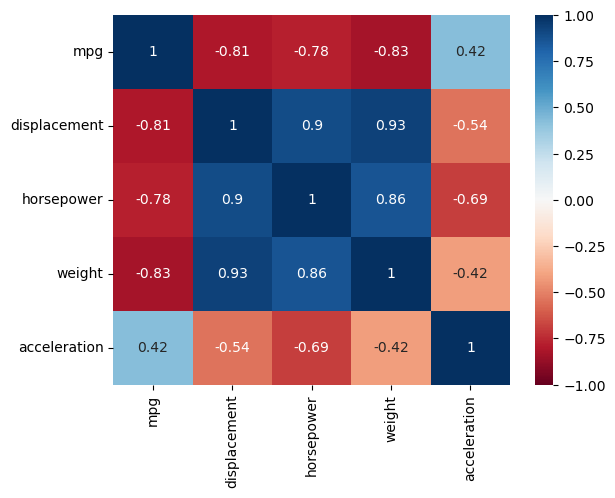

In [13]:
# Recognizing the CSV data type, drops information related to the Origin (that is, `loc`)
data_attributes = data_dist.copy().drop(columns=['origin']).corr()

# Create a heatmap of these attributes, with origin discarded
auto_mpg_heatmap = sns.heatmap(data_attributes, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')

The Pearson correlation matrix gives us the likelihood of correlating one attribute to the other. The distribution of mpg vs. mpg naturally has a 1 to 1 correlation. Beyond this, the best attribute to choose
for mpg correlation would be weight. Using the two, we might be able to generate a good regression model to predict future mpg given a potential weight. Note this is assuming we make use of simple linear regression. So the worst attribute would be acceleration, because it has poor correlation to mpg, and would likely produce a poor linear regression model to predict mpg.

Note, this is determined by the absolute values of the Pearson correlation coefficients. The sign indicates whether the attribute distribution is above or below the center. It is the value itself which indicates correlation.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

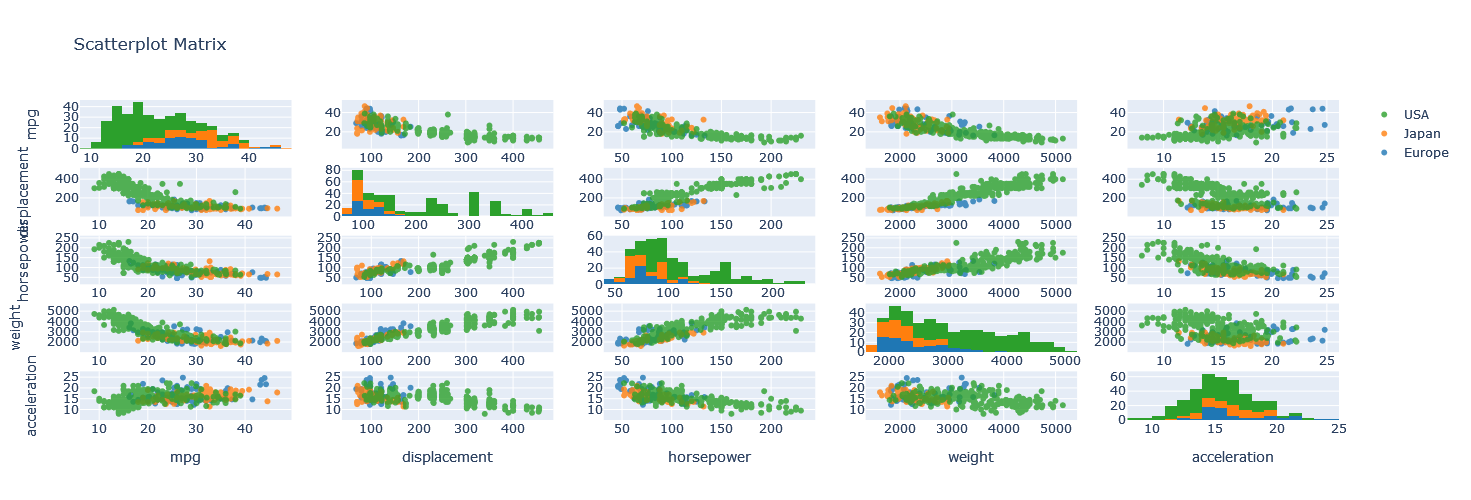

In [14]:
figure = ff.create_scatterplotmatrix(data_dist, diag='histogram', index='origin', opacity=.8)
figure.show()

If we are interested in using the `horsepower` attributed to predict `mpg`, the method which would lead to the best prediction performance is a polynomial regression. The class of polynomial regressions is wide, but the distribution of these two attributes would correlate most closely to some form of polynomial. The plot of this f(x) would fit closest to the distribution, out of the three options mentioned.

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [16]:
# We now split the dataset given to us to be 80% training and 20% testing. That is, we reserve 20% of the set to test the predictive qualities of our regressive learning model.
# Excise useless non-numerical attribute, and the attribute we wish to predict, from both the training and testing set. 
train, test = train_test_split(data_dist, test_size=0.2, random_state=30)
X_train, y_train = train.drop(columns=['mpg', 'origin']), train['mpg']
X_test, y_test = test.drop(columns=['mpg', 'origin']), test['mpg']

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [17]:
# Choose the train attribute to be weight
X_train, X_test = X_train["weight"], X_test["weight"]

lr = LinearRegression()

lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))
                
# Determine the mean squared error of the test data
predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))
mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1))

29.394459161770712

### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [19]:

# Loop through the three polynomial regression models, and calculate the MSE for the trainset and testset (of each)
for n in range(2, 5):
    poly_model = PolynomialFeatures(degree = n, include_bias = False)
    X_poly = poly_model.fit_transform(np.asarray(X_train).reshape(-1,1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    
    # Determine the mean squared error of the test data
    predicted = plr.predict(poly_model.transform(np.asarray(X_test).reshape(-1, 1)))
    print("The MSE of the testing data for degree ", n, " polynomial regression is: ", mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)))
    
    
    # Determine the mean squared error of the train data
    predicted = plr.predict(poly_model.transform(np.asarray(X_train).reshape(-1, 1)))
    print("The MSE of the training data for degree ", n, " polynomial regression is: ", mean_squared_error(predicted, np.asarray(y_train).reshape(-1, 1)))
    
    

The MSE of the testing data for degree  2  polynomial regression is:  28.88529704839351
The MSE of the training data for degree  2  polynomial regression is:  14.425591341537116
The MSE of the testing data for degree  3  polynomial regression is:  28.887467546231516
The MSE of the training data for degree  3  polynomial regression is:  14.425510825117746
The MSE of the testing data for degree  4  polynomial regression is:  28.92746717175381
The MSE of the training data for degree  4  polynomial regression is:  14.392787294229725


Based upon the MSE readings, there appears to be a sign of overfitting, because the testing data is performing much more poorly than the training data (it has about double the error). However, the increased
complexity of the third and fourth degree polynomials is doing very little to affect the MSE. It seems as though all of the polynomial regressions, although performing poorly, and performing equally poorly.
Overfitting occurs when the testing set performs poorly. All of the models are too close on the training set, and need to be less complex (more room for generality). 

## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

In [12]:
# Acquire the dataset
data_dist = pd.read_csv('fitting.csv')
print(data_dist)

# Determine SSE's of Training Pred 1, 2, and 3
pred_train1 = data_dist["Prediction 1 Training"]
actual_train = data_dist["Training Data"]
sse_train1 = np.sum((pred_train1 - actual_train) ** 2)
print("SSE of first prediction on training data: ", sse_train1)

pred_train2 = data_dist["Prediction 2 Training"]
sse_train2 = np.sum((pred_train2 - actual_train) ** 2)
print("SSE of second prediction on training data: ", sse_train2)

pred_train3 = data_dist["Prediction 3 Training"]
sse_train3 = np.sum((pred_train3 - actual_train) ** 2)
print("SSE of third prediction on training data: ", sse_train3)

# Determine SSE's of Testing Pred 1, 2, and 3
pred_test1 = data_dist["Prediction 1 Test"]
actual_test = data_dist["Test Data"]
sse_test1 = np.sum((pred_test1 - actual_test) ** 2)
print("SSE of first prediction on test data: ", sse_test1)

pred_test2 = data_dist["Prediction 2 Test"]
sse_test2 = np.sum((pred_test2 - actual_test) ** 2)
print("SSE of second prediction on test data: ", sse_test2)

pred_test3 = data_dist["Prediction 3 Test"]
sse_test3 = np.sum((pred_test3 - actual_test) ** 2)
print("SSE of third prediction on test data: ", sse_test3)

# Determine Variance of Training Pred 1, 2, and 3
var_train1 = np.var(pred_train1)
print("Variance of first prediction on train data: ", var_train1)
var_train2 = np.var(pred_train2)
print("Variance of second prediction on train data: ", var_train2)
var_train3 = np.var(pred_train3)
print("Variance of third prediction on train data: ", var_train3)

# Determine Variance of Testing Pred 1, 2, and 3
var_test1 = np.var(pred_test1)
print("Variance of first prediction on test data: ", var_test1)
var_test2 = np.var(pred_test2)
print("Variance of second prediction on test data: ", var_test2)
var_test3 = np.var(pred_test3)
print("Variance of third prediction on test data: ", var_test3)



    Training Data  Prediction 1 Training  Prediction 2 Training  \
0            0.31                   0.50                   0.47   
1            0.39                   0.41                   0.33   
2            0.22                   0.51                   0.67   
3            0.16                   0.70                   0.35   
4           -0.88                   0.46                   0.44   
5            0.79                   0.39                   0.46   
6            0.60                   0.52                   0.67   
7           -0.76                   0.42                   0.33   
8            0.10                   0.50                   0.51   
9           -0.22                   0.53                   0.60   
10          -0.86                   0.50                   0.47   
11          -0.28                   0.51                   0.38   
12          -0.14                   0.52                   0.49   
13           0.67                   0.66                   0.6

### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

Overfitting, underfitting amd base prediction categorizations can be determined by comparing the error and variance of predictions on a testset and trainet for the same machine. 
In our exercise, we are using three machines to run a prediction on the testset and dataset. The error and variance values from these prediction give us some insight into the fit of
each machine. 

A high variance but low bias indicates that the ML model is overfitting, and inversely, a low variance and high bias means it is underfitting.

We can determine if these values are high or low relatively: establish the range for the measures separately by looking at the values. For my case, variance range is 0.005-1.01, and SSE range is 2.1-19.2. 

The ML model of the first prediction has moderately high bias and an insanely low variance, so it is likely underfitting.

The ML model of the second prediction has a huge gap in SSE from training to testing, but next to none in it's variance. This should be a base fit. Values are relatively in the middle of my specified ranges, and the variance is low, but not insanely low.

The ML model of the third prediction has absurdly high variance, and a very high bias. It doesn't overfit nor underfit, but also doesn't offer a great base prediction.

## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the 'BloodPressure' attribute.<br >
Highlight the outliers in the box plot with special colors.

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

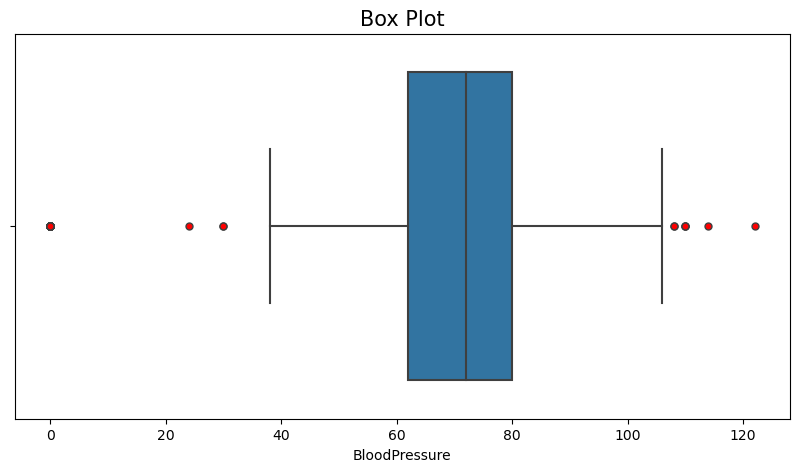

In [20]:
# Get the data distibution 
data_dist = pd.read_csv('diabetes.csv')
print(data_dist)

# Create a box plot
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = data_dist.BloodPressure, flierprops = dict(markerfacecolor = 'red', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.show()

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

Text(0, 0.5, 'Insulin')

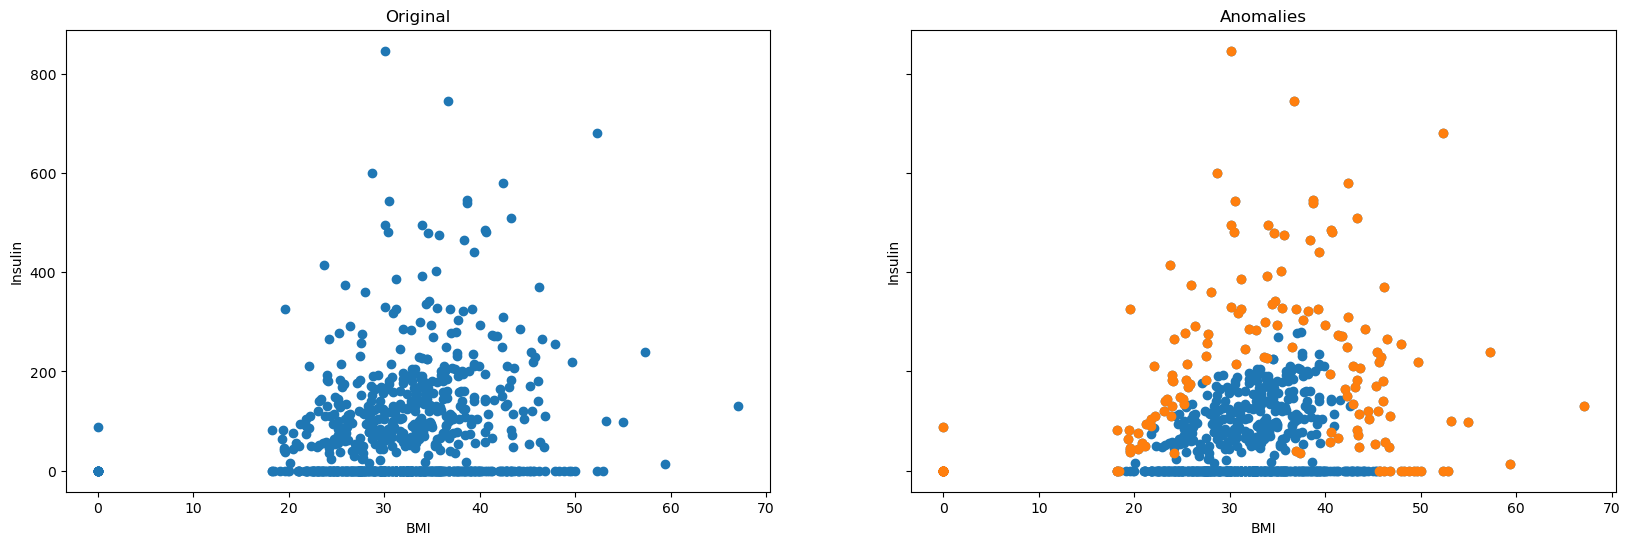

In [22]:
data_dist = data_dist[["BMI", "Insulin"]]

input = data_dist.to_numpy()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)

svm.fit(input)

pred = svm.predict(input)

anom_index = where(pred==-1)
values = input[anom_index]

fig, (ax0, ax1)=plt.subplots(1, 2, sharey = True, figsize = (20, 6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(data_dist["BMI"], data_dist["Insulin"])
ax0.set_xlabel("BMI")
ax0.set_ylabel("Insulin")

ax1.set_title('Anomalies')
ax1.scatter(input[:,0], input[:,1])
ax1.scatter(values[:,0], values[:,1])
ax1.set_xlabel("BMI")
ax1.set_ylabel("Insulin")

